<a href="https://colab.research.google.com/github/peta-m175/rabbit_challenge/blob/master/deep_learning/day4/seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seq2Seq

系列(Sequence)を入力として、系列を出力する
- Encoder-Decoderモデルとも呼ぶ
- 入力系列がEncode(内部状態に変換)され、内部状態からDecode(系列に変換)する
- 実応用上も、入力・出力共に系列情報なものは多い
  - 翻訳(英語->日本語)
  - 音声認識(波形->テキスト)
  - チャットボット(テキスト->テキスト)

## 言語モデル

単語の並びに確率を与える
- 単語の並びに対して尤度(それがどれだけ起こり得るか)->文章として自然かを確立で評価
- 数式的には同時確率を事後確率に分解して表せる
$$
P(w_1,\dots,w_m)=\prod_{i=1}^mP(w_i|w_1,\dots,w_{i-1})
$$

時刻t-1までの情報で、時刻tの事後確率を求まることが目標\
->同時確率が計算できる
$$
{argmax}_{w\in V}P(I,have, a, w)
$$
$w$ <- dog, pen, PC, what, etc..

## RRN x 言語モデル

各地点で次にどの単語が来れば自然(事後確率最大)かを出力
- 言語モデルを再現するようにRNNの重みが学習されていれば、ある時点の次の単語を予測することができる\
  ->先頭単語を与えれば文章を生成することも可能

## Seq2seq

EncoderからDecoderに渡される内部状態ベクトルが鍵
- Decoder側の構造は言語モデルRNNとほぼ同じだが、隠れ状態の初期値にEncoder側の内部状態を受け取る

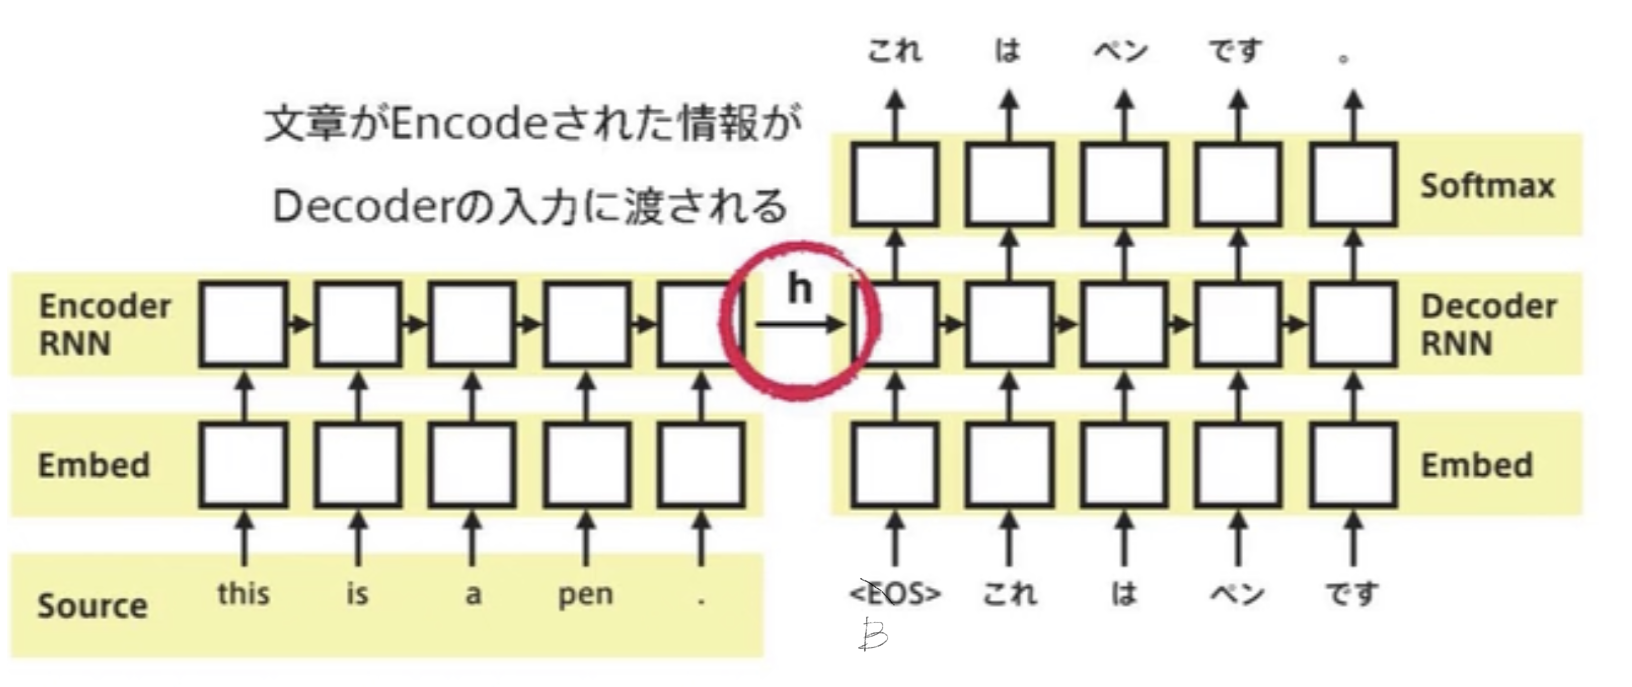